In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('..')
from src import funciones as f
from src import soporte_prep as sp

# Importaciones:
# Beautifulsoup
from bs4 import BeautifulSoup

# Requests
import requests

import pandas as pd
import numpy as np

from time import sleep

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
driver = webdriver.Chrome()
url_accidentes = "https://www.one.gob.do/datos-y-estadisticas/"
driver.get(url_accidentes)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/ul/li[2]/a').click()
except:
    print('No encuentro el botón')

sleep(2)

for i in range(2):
    try:
        driver.execute_script("window.scrollBy(0, 500);")  # Desplazarse 1000 píxeles hacia abajo
    except:
        print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/header/div[2]').click()
except:
    print('No encuentro el botón para ampliar')
sleep(2)
try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/header/div[1]').click()
except:
    print('No encuentro el botón para abrir pestañas')
sleep(2)
try:
    driver.execute_script("window.scrollBy(0, 700);")
except:
    print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div/div/div/div[2]/div/table/tbody/tr[6]/td/a').click()
except:
    print('No encuentro el botón para descargar') #descargo el libro de códigos de accidentes de tráfico, lasdefunciones

try:
    driver.execute_script("window.scrollBy(0, 500);")
except:
    print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[7]/section/div/div[3]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/div/div/div/div[2]/div/table/tbody/tr[17]/td/a').click()
except:
    print('No encuentro el botón para descargar') #descargo las defunciones por accidentes de tráfico

# Tablas de Bases de datos

### Tabla principal

In [2]:
df_principal = pd.read_csv('C:\\Users\\DELL\\Downloads\\BD_MUERTES_ACCIDENTES_2007-2023.csv', sep=';')

### Definir lo que significa cada columna

- CAUSA_M: muerte en accidente.
- REGION: region donde ocurrió.
- PROVINCIA: provincia donde ocurrió.
- DIASEMANA: día de la semana.
- MESOCU: mes.
- ANOOCU: año de ocurrencia.
- RHORA: rango de hora.
- TVIA: tipo de vía donde ocurrió.
- SEXO: género de la persona.
- GRUPOEDAD: grupo de edad.
- CONDIVICTIMA: condición de la víctima.
- TIPOACCIDENTE: tipo de accidente.
- MEDIOTRANS: medio de transporte.
- VEHICHOQUE: vehículo con el que chocó.
- ESTRECON: objeto con el que se estralló.

In [3]:
df_principal.head()

,CAUSA_M,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS,ESTRECON,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,APLASTAM,OTROACCIDEN
0,V01-V99,1,9,6,1,2007,10,99,1,5,9,1,2,,8,,,,,,
1,V01-V99,1,9,7,1,2007,1,4,1,12,9,1,2,,1,,,,,,
2,V01-V99,1,9,4,2,2007,11,4,1,4,9,1,2,,1,,,,,,
3,V01-V99,1,9,1,2,2007,6,99,1,1,9,3,25,,,,3,,,,
4,V01-V99,1,9,4,3,2007,10,4,1,5,9,1,2,,4,,,,,,


In [4]:
df_principal['ANOOCU'].value_counts()

ANOOCU
2010    2132
2019    2100
2016    1991
2023    1949
2015    1946
2013    1892
2021    1874
2009    1873
2014    1855
2008    1846
2011    1833
2022    1794
2012    1768
2007    1747
2020    1737
2017    1587
2018    1427
Name: count, dtype: int64

In [5]:
df_principal.nunique()

CAUSA_M           1
REGION           11
PROVINCIA        33
DIASEMANA         7
MESOCU           12
ANOOCU           17
RHORA            13
TVIA             14
SEXO              3
GRUPOEDAD        15
CONDIVICTIMA      4
TIPOACCIDENTE     9
MEDIOTRANS       25
ESTRECON         19
VEHICHOQUE       26
VEHICUVOLC       16
VEHICUATRO       24
VEHICAIDA        19
VEHIDESLI        19
APLASTAM         10
OTROACCIDEN       5
dtype: int64

In [6]:
df_principal.drop(columns='CAUSA_M', inplace=True)

In [7]:
df_principal.head()

,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS,ESTRECON,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,APLASTAM,OTROACCIDEN
0,1,9,6,1,2007,10,99,1,5,9,1,2,,8,,,,,,
1,1,9,7,1,2007,1,4,1,12,9,1,2,,1,,,,,,
2,1,9,4,2,2007,11,4,1,4,9,1,2,,1,,,,,,
3,1,9,1,2,2007,6,99,1,1,9,3,25,,,,3,,,,
4,1,9,4,3,2007,10,4,1,5,9,1,2,,4,,,,,,


### Tablas secundarias

In [8]:
driver = webdriver.Chrome()
url_defunciones = "file:///C:/Users/DELL/Downloads/Libro%20de%20c%C3%B3digos%20de%20defunciones%20en%20accidentes%20de%20tr%C3%A1nsito%202007_2023.htm"
driver.get(url_defunciones)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll

In [9]:
sopa_defunciones = BeautifulSoup(driver.page_source)


In [10]:
lista_tablas = sopa_defunciones.findAll('div', {'class': 'itemBody'})


In [11]:
lista_tablas[0]

<div class="itemBody">
<table aria-label="CAUSA_M" class="Default PivotTable" data-col-labels="Valor" data-collabelheight="1" data-column-dimension="Valores;" data-decimal-char="." data-layer-dimension="" data-lookname="Default" data-maxcolwidth="72" data-numcols="1" data-numrows="3" data-row-dimension="Atributos;" data-row-labels="Atributos estándar Etiqueta; Formato;Valores válidos V01-V99" data-rowlabels="Corner" data-rowlabelwidth="2" role="complementary" style="width:280px" summary="CAUSA_M, tabla, 1 niveles de cabeceras de columna y 2 niveles de cabeceras de fila, tabla con 3 columnas y 5 filas">
<caption class="title" style="width:280px">CAUSA_M<span class="details">CAUSA_M, tabla, 1 niveles de cabeceras de columna y 2 niveles de cabeceras de fila, tabla con 3 columnas y 5 filas</span></caption>
<tbody class="PivotBody defaultLayer innerFrameBd">
<tr>
<td class="cornerLabels" colspan="2"> </td>
<td class="columnLabels dataAreaLeft vCC role3">Valor</td>
</tr>
<tr>
<td class="rowL

In [12]:
dataframes = []

for i, tabla in enumerate(lista_tablas):
    rows = tabla.find_all('tr')

    data = []
    for row in rows:
        cells = row.find_all('td')
        data.append([cell.get_text(strip=True) for cell in cells if cell.get_text(strip=True)])

    df = pd.DataFrame(data)

    dataframes.append(df)

print(f"Se generaron {len(dataframes)} DataFrames.")

Se generaron 21 DataFrames.


In [13]:
type(dataframes)

list

In [14]:
df_region = dataframes[1]
df_provincia = dataframes[2]
df_diasem = dataframes[3]
df_mes = dataframes[4]
df_rhora = dataframes[6]
df_tipovia = dataframes[7]
df_genero = dataframes[8]
df_gedad = dataframes[9]
df_victima = dataframes[10]
df_accidente = dataframes[11]
df_mediot = dataframes[12]
# df_estrello = dataframes[13]
# df_vehichoque = dataframes[14]

In [15]:
df_diasem.to_csv('../Datos/datos_defunciones/df_diasem.csv')
df_mes.to_csv('../Datos/datos_defunciones/df_mes.csv')
df_rhora.to_csv('../Datos/datos_defunciones/df_rhora.csv')
df_region.to_csv('../Datos/datos_defunciones/df_region.csv')
df_provincia.to_csv('../Datos/datos_defunciones/df_provincia.csv')
df_tipovia.to_csv('../Datos/datos_defunciones/df_tipovia.csv')
df_accidente.to_csv('../Datos/datos_defunciones/df_accidente.csv')
df_mediot.to_csv('../Datos/datos_defunciones/df_mediot.csv')
df_genero.to_csv('../Datos/datos_defunciones/df_genero.csv')
df_gedad.to_csv('../Datos/datos_defunciones/df_gedad.csv')
df_victima.to_csv('../Datos/datos_defunciones/df_victima.csv')

In [16]:
dataframes_list = [
    df_region, df_provincia, df_diasem, df_mes, df_rhora,
    df_tipovia, df_genero, df_gedad, df_victima, df_accidente,
    df_mediot
]

for i, df in enumerate(dataframes_list):
    # me quedo con las filas a partir de la fila 3 porque así me quedo solo con el contenido
    df = df.iloc[3:]
    
    # coloco el primer valor en su lugar, ya que viene en la columna equivocada
    df.iloc[0, 1] = df.iloc[0, 2]
    df.iloc[0,0] = 1
    
    # me quedo solo la primera columna
    df = df[[0,1]]
    df = df[:-1]
    df.columns = ['Valor', 'Significado']
    df['Valor'] = df['Valor'].astype('int64')

    # reinicio el índice
    df.reset_index(drop=True, inplace=True)
    
    # guardo el df transformado de nuevo en la lista
    dataframes_list[i] = df

# Asignar los DataFrames de vuelta a sus variables
df_region, df_provincia, df_diasem, df_mes, df_rhora, \
df_tipovia, df_genero, df_gedad, df_victima, df_accidente, \
df_mediot = dataframes_list


In [17]:
df_principal['FECHA'] = pd.to_datetime(df_principal['ANOOCU'].astype(str) + '-' + 
                                    df_principal['MESOCU'].astype(str) + '-' + 
                                    df_principal['DIASEMANA'].astype(str), 
                                    format='%Y-%m-%d')
# creo la columna de fecha completa
df_principal.head()

,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS,ESTRECON,VEHICHOQUE,VEHICUVOLC,VEHICUATRO,VEHICAIDA,VEHIDESLI,APLASTAM,OTROACCIDEN,FECHA
0,1,9,6,1,2007,10,99,1,5,9,1,2,,8,,,,,,,2007-01-06
1,1,9,7,1,2007,1,4,1,12,9,1,2,,1,,,,,,,2007-01-07
2,1,9,4,2,2007,11,4,1,4,9,1,2,,1,,,,,,,2007-02-04
3,1,9,1,2,2007,6,99,1,1,9,3,25,,,,3,,,,,2007-02-01
4,1,9,4,3,2007,10,4,1,5,9,1,2,,4,,,,,,,2007-03-04


In [18]:
df_llena = df_principal.copy()

In [19]:
ultima_columna = df_llena.columns[-1] 
columnas = [ultima_columna] + [col for col in df_llena.columns if col != ultima_columna]
df_llena = df_llena[columnas]

In [20]:
df_llena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31351 entries, 0 to 31350
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          31351 non-null  datetime64[ns]
 1   REGION         31351 non-null  int64         
 2   PROVINCIA      31351 non-null  int64         
 3   DIASEMANA      31351 non-null  int64         
 4   MESOCU         31351 non-null  int64         
 5   ANOOCU         31351 non-null  int64         
 6   RHORA          31351 non-null  int64         
 7   TVIA           31351 non-null  int64         
 8   SEXO           31351 non-null  int64         
 9   GRUPOEDAD      31351 non-null  int64         
 10  CONDIVICTIMA   31351 non-null  int64         
 11  TIPOACCIDENTE  31351 non-null  int64         
 12  MEDIOTRANS     31351 non-null  int64         
 13  ESTRECON       31351 non-null  object        
 14  VEHICHOQUE     31351 non-null  object        
 15  VEHICUVOLC     3135

In [21]:
df_llena = df_llena.iloc[:,0:13] #corto las columnas que quiero

In [22]:
df_llena.head()

,FECHA,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS
0,2007-01-06,1,9,6,1,2007,10,99,1,5,9,1,2
1,2007-01-07,1,9,7,1,2007,1,4,1,12,9,1,2
2,2007-02-04,1,9,4,2,2007,11,4,1,4,9,1,2
3,2007-02-01,1,9,1,2,2007,6,99,1,1,9,3,25
4,2007-03-04,1,9,4,3,2007,10,4,1,5,9,1,2


In [23]:
# lista de tuplas con las columnas a mapear, el df correspondiente y la columna única
mapeos = [
    ('TIPOACCIDENTE', df_accidente), ('REGION', df_region), ('PROVINCIA', df_provincia), ('DIASEMANA', df_diasem), ('MESOCU', df_mes), ('RHORA', df_rhora),
    ('TVIA', df_tipovia), ('SEXO', df_genero),('GRUPOEDAD', df_gedad), ('CONDIVICTIMA', df_victima), ('MEDIOTRANS', df_mediot),
]

for columna, df_mapeado in mapeos:
    mapeo = dict(zip(df_mapeado['Valor'], df_mapeado['Significado']))
    valores = df_llena[columna].unique()
    mapeo_filtrado = {k: v for k, v in mapeo.items() if k in valores}
    df_llena[columna] = df_llena[columna].map(mapeo_filtrado)

## EDA

El data frame de defunciones nos arroja las siguientes observaciones:
- 31351 filas por 13 columnas
- 721 duplicados, lo cual equivale a menos de un 3% (2.30%). No procedo a eliminarlos ya que puede existir el caso de accidentes muy similares, y ser distintos. Por ende prosigo con ellos.
- Los datos van desde el 2007 hasta el 2023, divididos entre los 12 meses del año
    - El año con más muertes producto de accidentes viales fue el 2010 con 2132, seguido del 2019 y 2016 en el top 3. Los dos primeros superan las 2 mil unidades, aunque el tercero queda ligeramente por debajo
    - El mes con más defunciones fue diciembre con 3151, seguido de marzo y julio
    - El día con más fallecidos fruto de accidentes fue el domingo, seguido de sábado y lunes. Además, aunque un poco apartado en cuanto a números, el siguiente lugar lo ocupa el viernes. Lo que señala que el fin de semana tiende a ser el tiempo más propenso donde se puedan perder vidas producto de los accidentes.
    - Las horas con más decunciones son entre 18-20, 20-22 y 16-18. Lo que demuestra un rango alarmante pero a la vez lógico porque estos suelen sus horarios de mucho movimiento vehicular
    - Las regiones con más víctimas fruto de accidentes son Ozama, Cibao Norte y Cibao Sur
    - Las provincias con más defunciones producto de accidentes son Santo Domingo, San Cristóbal y Santiago
    - El tipo de vía más que más vidas ha cobrado es la Carretera, seguido de la calle y avenida. Aunque la autopista no se queda muy por detrás.
    - El género con mayor cantidad de vidas perdidas es el masculino (87%)
    - El grupo de edad con mayor cantidad de víctimas está entre 20-24, seguido de 25-29 y 15-19. Lo que nos indica que la mayor cantidad de defunciones son de personas jóvenes
    - La condición de la víctima en el accidente, en su mayoría no se ha logrado declarar (41.88%). Sin embargo, el segundo lugar está ocupado por el conductor como la víctima de dichos accidentes (40.19%)
    - El tipo de accidente suele ser producto de un choque, seguido de atropellamiento y deslizamiento.
    - El medio de transporte que predomina en los accidentes es la motocicleta (63.73%), seguido se encuentra el peatón atropellado (18.42%), ocupando el tercer puesto el automóvil.

In [24]:
df_llena.head()

,FECHA,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS
0,2007-01-06,Región Cibao Norte,Espaillat,Sábado,Enero,2007,18:01-20:00,No declarada,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
1,2007-01-07,Región Cibao Norte,Espaillat,Domingo,Enero,2007,00:01-02:00,Carretera,Hombres,55-59,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
2,2007-02-04,Región Cibao Norte,Espaillat,Jueves,Febrero,2007,20:01-22:00,Carretera,Hombres,15-19,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
3,2007-02-01,Región Cibao Norte,Espaillat,Lunes,Febrero,2007,10:01-12:00,No declarada,Hombres,0-4,No declarada,Atropellamiento,Peatón atropellado
4,2007-03-04,Región Cibao Norte,Espaillat,Jueves,Marzo,2007,18:01-20:00,Carretera,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"


In [25]:
f.exploracion_dataframe(df_llena)

El número de datos es 31351 y el de columnas es 13

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 721

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
FECHA,datetime64[ns]
REGION,object
PROVINCIA,object
DIASEMANA,object
MESOCU,object
ANOOCU,int64
RHORA,object
TVIA,object
SEXO,object
GRUPOEDAD,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna REGION tiene los siguientes valores únicos:


,count
REGION,
Región Ozama,6377
Región Cibao Norte,4644
Región Cibao Sur,3826
Región Valdesia,3489
Región Yuma,2951
Región Cibao Nordeste,2926
Región El Valle,2111
Región Higuamo,2056
Región Cibao Noroeste,1775


La columna PROVINCIA tiene los siguientes valores únicos:


,count
PROVINCIA,
Santo Domingo,4776
San Cristóbal,2373
Santiago,2325
La Vega,2168
La Altagracia,1919
Distrito Nacional,1601
Puerto Plata,1393
Duarte,1186
Monseñor Nouel,1073


La columna DIASEMANA tiene los siguientes valores únicos:


,count
DIASEMANA,
Domingo,7943
Sábado,5112
Lunes,5023
Viernes,3628
Jueves,3343
Martes,3254
Miércoles,3048


La columna MESOCU tiene los siguientes valores únicos:


,count
MESOCU,
Diciembre,3151
Marzo,2688
Julio,2686
Enero,2675
Octubre,2658
Noviembre,2605
Abril,2560
Febrero,2551
Mayo,2537


La columna RHORA tiene los siguientes valores únicos:


,count
RHORA,
18:01-20:00,3779
20:01-22:00,3600
16:01-18:00,2973
10:01-12:00,2581
14:01-16:00,2500
22:01-24:00,2442
00:01-02:00,2432
08:01-10:00,2354
12:01-14:00,2327


La columna TVIA tiene los siguientes valores únicos:


,count
TVIA,
Carretera,13836
Calle,6042
Avenida,4613
Autopista,4530
No declarada,1533
Autovía,340
Bulevar,156
Puente,128
Camino vecinal,83


La columna SEXO tiene los siguientes valores únicos:


,count
SEXO,
Hombres,27389
Mujeres,3891
No declarado,71


La columna GRUPOEDAD tiene los siguientes valores únicos:


,count
GRUPOEDAD,
No declarado,8134
20-24,4017
25-29,2974
15-19,2800
30-34,2365
35-39,1996
65 y más,1756
40-44,1599
45-49,1372


La columna CONDIVICTIMA tiene los siguientes valores únicos:


,count
CONDIVICTIMA,
No declarada,13132
Conductor,12600
Pasajero,2824
Peatón,2795


La columna TIPOACCIDENTE tiene los siguientes valores únicos:


,count
TIPOACCIDENTE,
Choque o colisión,17915
Atropellamiento,5779
Deslizamiento,5216
Estrellamiento,1282
Vuelco o vuelcadura,849
Caída,277
Aplastamiento,18
No declarado,12
Otros,3


La columna MEDIOTRANS tiene los siguientes valores únicos:


,count
MEDIOTRANS,
"Motocicleta, ciclomotor (passola)",19981
Peatón atropellado,5775
Automóvil (carro),2077
"Yipeta, yip",930
Camión,831
Camioneta,723
No declarado,364
Autobús,264
"Minibús, miniván",194


In [26]:
df_llena['ANOOCU'].value_counts() # cantidad de muertes por accidentes en cada año

ANOOCU
2010    2132
2019    2100
2016    1991
2023    1949
2015    1946
2013    1892
2021    1874
2009    1873
2014    1855
2008    1846
2011    1833
2022    1794
2012    1768
2007    1747
2020    1737
2017    1587
2018    1427
Name: count, dtype: int64

In [27]:
df_llena['SEXO'].value_counts(normalize=True) *100

SEXO
Hombres         87.362445
Mujeres         12.411087
No declarado     0.226468
Name: proportion, dtype: float64

Los hombres son aquellos que más mueren por encima de las mujeres.

In [28]:
df_llena['MEDIOTRANS'].value_counts(normalize=True) *100

MEDIOTRANS
Motocicleta, ciclomotor (passola)    63.733214
Peatón atropellado                   18.420465
Automóvil (carro)                     6.624988
Yipeta, yip                           2.966413
Camión                                2.650633
Camioneta                             2.306147
No declarado                          1.161047
Autobús                               0.842078
Minibús, miniván                      0.618800
Bicicleta                             0.261555
Otros                                 0.169054
Tractor                               0.060604
Animal                                0.035087
Patana                                0.031897
Furgoneta                             0.019138
Vehículo le cayó encima               0.019138
Ambulancia                            0.019138
Triciclo                              0.015948
Volteo                                0.009569
Excavadora                            0.009569
Pala mecánica                         0.006379
Ca

En los fallecidos por accidentes de tránsito, los principales medios involucrados fueron la moto (63.73%), un peatón (18.42%) y automóviles (6.62%)

In [29]:
df_num, df_cat = f.separar_dataframes(df_llena)

In [30]:
df_llena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31351 entries, 0 to 31350
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          31351 non-null  datetime64[ns]
 1   REGION         31351 non-null  object        
 2   PROVINCIA      31351 non-null  object        
 3   DIASEMANA      31351 non-null  object        
 4   MESOCU         31351 non-null  object        
 5   ANOOCU         31351 non-null  int64         
 6   RHORA          31351 non-null  object        
 7   TVIA           31351 non-null  object        
 8   SEXO           31351 non-null  object        
 9   GRUPOEDAD      31351 non-null  object        
 10  CONDIVICTIMA   31351 non-null  object        
 11  TIPOACCIDENTE  31351 non-null  object        
 12  MEDIOTRANS     31351 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 3.1+ MB


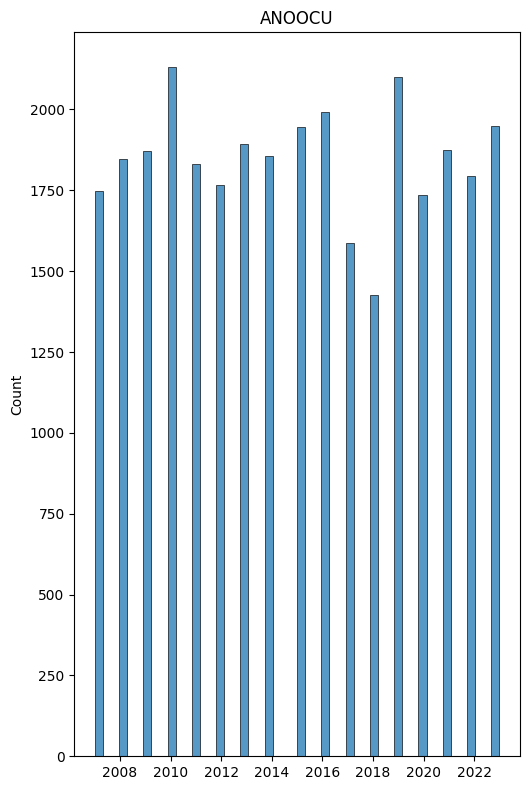

In [31]:
f.plot_numericas(df_num)

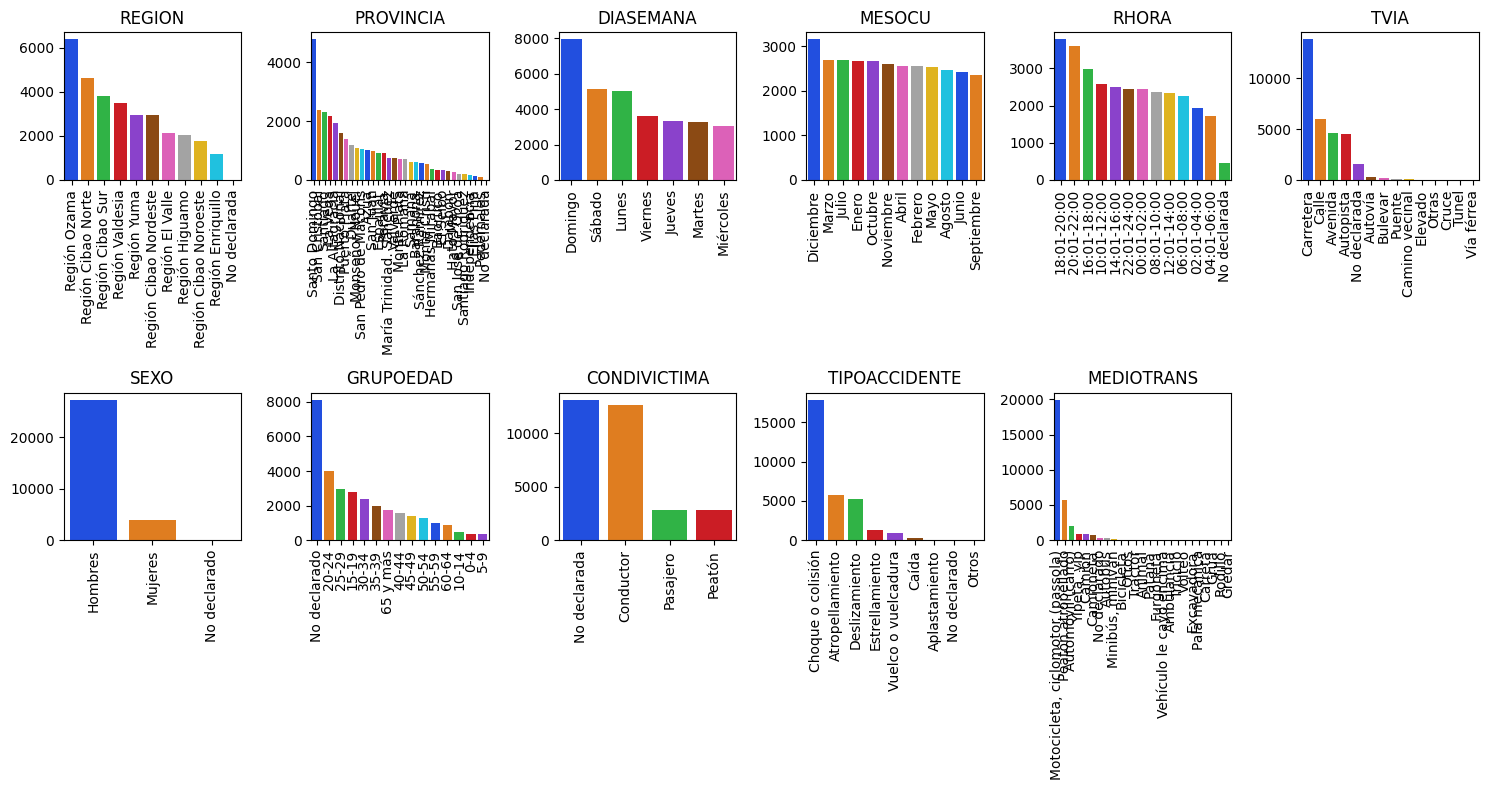

In [32]:
f.plot_categoricas(df_cat)

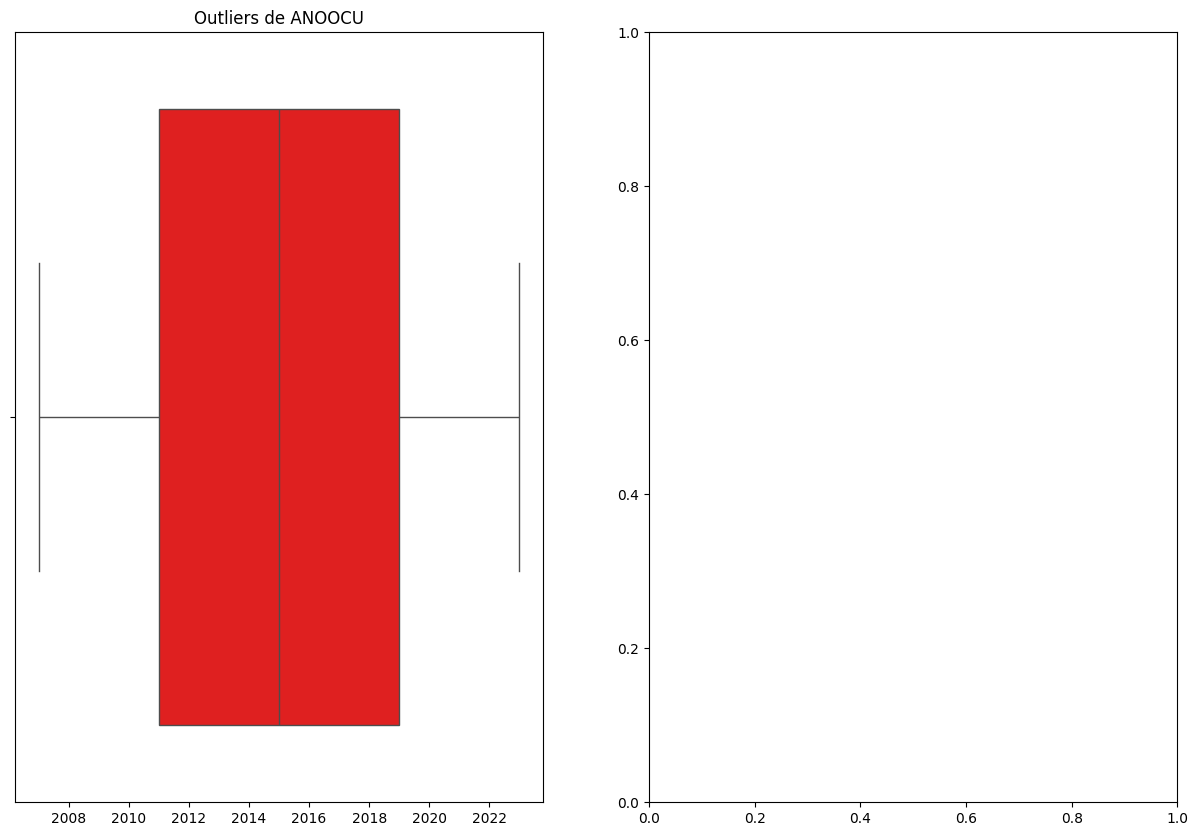

In [33]:
f.detectar_outliers(df_llena)

Solo tengo una variable numérica, los años. Esta no presenta ningún outlier. Se puede observar como se presenta un corte (50% de los casos) está justo en el 2015.

### Diferencias geográficas

In [34]:
df_llena.groupby(['REGION', 'PROVINCIA'])[['TVIA']].count().sort_index()

TVIA
REGION                PROVINCIA                    
No declarada          No declarada                5
Región Cibao Nordeste Duarte                   1186
                      Hermanas Mirabal          388
                      María Trinidad. Sánchez   746
                      Samaná                    606
Región Cibao Noroeste Dajabón                   294
                      Monte Cristi              535
                      Santiago Rodríguez        204
                      Valverde                  742
Región Cibao Norte    Espaillat                 926
                      Puerto Plata             1393
                      Santiago                 2325
Región Cibao Sur      La Vega                  2168
                      Monseñor Nouel           1073
                      Sánchez Ramírez           585
Región El Valle       Azua                     1009
                      Elías Piña                133
                      San Juan                  969
Región Enriquillo     Baoruco                   334
                      Barahona                  598
                      Independencia             167
                      Pedernales                 92
Región Higuamo        Hato Mayor                267
                      Monte Plata               728
                      San Pedro de Macorís     1061
Región Ozama          Distrito Nacional        1601
                      Santo Domingo            4776
Región Valdesia       Peravia                   910
                      San Cristóbal            2373
                      San José de Ocoa          206
Región Yuma           El Seibo                  325
                      La Altagracia            1919
                      La Romana                 707

In [35]:
tabla_pivote_region = df_llena.pivot_table(
    index='REGION',        # regiones serán las filas
    columns='ANOOCU',         # años serán las columnas
    values='TIPOACCIDENTE',  
    aggfunc='count',       # cantidad de accidentes
)

tabla_pivote_region['Total'] = tabla_pivote_region.sum(axis=1)  
tabla_pivote_region = tabla_pivote_region.sort_values(by='Total', ascending=False)
tabla_pivote_region

ANOOCU,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
REGION,,,,,,,,,,,,,,,,,,
Región Ozama,446.0,495.0,455.0,496.0,418.0,419.0,426.0,355.0,299.0,322.0,271.0,280.0,392.0,321.0,308.0,326.0,348.0,6377.0
Región Cibao Norte,247.0,236.0,293.0,293.0,237.0,237.0,298.0,312.0,349.0,310.0,236.0,227.0,333.0,224.0,291.0,245.0,276.0,4644.0
Región Cibao Sur,179.0,210.0,233.0,276.0,224.0,202.0,214.0,222.0,253.0,255.0,218.0,161.0,281.0,217.0,239.0,214.0,228.0,3826.0
Región Valdesia,197.0,230.0,228.0,245.0,223.0,148.0,175.0,192.0,152.0,212.0,179.0,206.0,227.0,240.0,185.0,199.0,251.0,3489.0
Región Yuma,193.0,191.0,160.0,154.0,152.0,148.0,171.0,164.0,190.0,199.0,142.0,117.0,200.0,144.0,205.0,193.0,228.0,2951.0
Región Cibao Nordeste,136.0,135.0,134.0,190.0,168.0,185.0,187.0,189.0,218.0,233.0,188.0,116.0,189.0,166.0,154.0,175.0,163.0,2926.0
Región El Valle,79.0,87.0,124.0,153.0,130.0,117.0,111.0,118.0,137.0,125.0,129.0,133.0,151.0,114.0,134.0,140.0,129.0,2111.0
Región Higuamo,123.0,145.0,112.0,125.0,115.0,120.0,120.0,106.0,133.0,137.0,102.0,76.0,124.0,128.0,144.0,130.0,116.0,2056.0
Región Cibao Noroeste,77.0,62.0,75.0,102.0,96.0,111.0,121.0,118.0,132.0,126.0,70.0,76.0,123.0,116.0,140.0,108.0,122.0,1775.0


A lo largo del tiempo vemos que la Región Ozama se ha mantenido en el primer lugar con relación a las muertes por accidentes de tránsito, a excepción del 2015 cuando la Regio Cibao Norte (segundo lugar) le superó. Para Ozama, era normal presentar más de 400 fallecidos hasta el 2013, a partir de ahí el números de víctimas tuvo reducciones aunque a partir del 2018 empieza a oscilar nuevamente entre 300-400.

Entre Cibao Norte y Cibao Sur, los fallecidos en accidentes de tránsito se mantienen oscilando entre 200 y 300 casos por año. A excepción de casos particular para el Cibao Norte (2014-2015-2016-2019) donde supera las 300 defunciones.

En el caso de Valdesia, con frecuencia supera los 200 casos al año aunque tiene distintos años donde no supera esta franja. El valor más alto que presenta en defunciones resulta ser el año más reciente: 2023.

In [36]:
tabla_pivote_provincia = df_llena.pivot_table(
    index='PROVINCIA',        # provincias serán las filas
    columns='ANOOCU',         # años serán las columnas
    values='TIPOACCIDENTE',  # columna a contar
    aggfunc='count',       # cantidad de accidentes
)

tabla_pivote_provincia['Total'] = tabla_pivote_provincia.sum(axis=1)  
tabla_pivote_provincia = tabla_pivote_provincia.sort_values(by='Total', ascending=False)
tabla_pivote_provincia

ANOOCU,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total
PROVINCIA,,,,,,,,,,,,,,,,,,
Santo Domingo,329.0,372.0,341.0,393.0,319.0,313.0,311.0,243.0,235.0,254.0,210.0,197.0,301.0,246.0,220.0,237.0,255.0,4776.0
San Cristóbal,148.0,174.0,177.0,178.0,160.0,100.0,124.0,132.0,98.0,121.0,115.0,145.0,147.0,166.0,109.0,116.0,163.0,2373.0
Santiago,117.0,108.0,153.0,165.0,101.0,137.0,135.0,146.0,164.0,147.0,118.0,154.0,164.0,121.0,155.0,120.0,120.0,2325.0
La Vega,71.0,85.0,148.0,166.0,136.0,115.0,119.0,135.0,146.0,153.0,122.0,97.0,167.0,127.0,126.0,123.0,132.0,2168.0
La Altagracia,131.0,131.0,94.0,103.0,105.0,103.0,96.0,110.0,125.0,127.0,84.0,84.0,140.0,86.0,126.0,123.0,151.0,1919.0
Distrito Nacional,117.0,123.0,114.0,103.0,99.0,106.0,115.0,112.0,64.0,68.0,61.0,83.0,91.0,75.0,88.0,89.0,93.0,1601.0
Puerto Plata,82.0,88.0,90.0,78.0,80.0,75.0,104.0,94.0,99.0,88.0,57.0,39.0,107.0,64.0,78.0,73.0,97.0,1393.0
Duarte,61.0,63.0,60.0,90.0,66.0,94.0,68.0,64.0,104.0,116.0,74.0,44.0,64.0,56.0,52.0,60.0,50.0,1186.0
Monseñor Nouel,89.0,83.0,52.0,61.0,56.0,56.0,40.0,59.0,69.0,54.0,69.0,53.0,73.0,57.0,75.0,62.0,65.0,1073.0


Se mantienen las misma provincias que tienen más accidentes, como las que tienen más muertes en base a estos: Santo Domingo, San Cristóbal, Santiago, La Vega y La Altagracia.

Destaca Santo Domingo porque duplica el caso de muertos, con relación a la provincia en segundo lugar, Santo Domingo (4776) a San Cristóbal (2373).

Santo Domingo, presentaba más de 300 fallecidos hasta el 2013 por esta razón. A partir del 2014 los fallecidos no superan los 260 casos (a excepción del 2019 con 301 fallecimientos). 

San Cristóbal tenía unos primeros números más altos (hasta 176 en 2010), a partir del 2011 los fallecidos están oscilando entre 100 y 160 anual. En los últimos 5 años solo resalta el 2020 con 163 defunciones.

### Diferencias por género

In [51]:
df_genero_medio = df_llena.groupby(['SEXO', 'MEDIOTRANS'])[['TVIA']].count().sort_values(by=['SEXO', 'TVIA'], ascending=[True, False])
df_genero_medio.rename(columns={'TVIA': 'Conteo'}, inplace=True)
df_genero_medio['Total por Sexo'] = df_genero_medio.groupby(level=0)['Conteo'].transform('sum')
df_genero_medio['Porcentaje (%)'] = (df_genero_medio['Conteo'] / df_genero_medio['Total por Sexo']) * 100
df_genero_medio

Conteo  Total por Sexo  \
SEXO         MEDIOTRANS                                                  
Hombres      Motocicleta, ciclomotor (passola)   18421           27389   
             Peatón atropellado                   4501           27389   
             Automóvil (carro)                    1590           27389   
             Camión                                763           27389   
             Yipeta, yip                           672           27389   
             Camioneta                             618           27389   
             No declarado                          299           27389   
             Autobús                               175           27389   
             Minibús, miniván                      147           27389   
             Bicicleta                              80           27389   
             Otros                                  49           27389   
             Tractor                                18           27389   
             Animal                                 11           27389   
             Patana                                 10           27389   
             Furgoneta                               6           27389   
             Vehículo le cayó encima                 6           27389   
             Ambulancia                              5           27389   
             Triciclo                                5           27389   
             Volteo                                  3           27389   
             Carreta                                 2           27389   
             Excavadora                              2           27389   
             Grúa                                    2           27389   
             Pala mecánica                           2           27389   
             Gredar                                  1           27389   
             Rodillo                                 1           27389   
Mujeres      Motocicleta, ciclomotor (passola)    1535            3891   
             Peatón atropellado                   1257            3891   
             Automóvil (carro)                     475            3891   
             Yipeta, yip                           257            3891   
             Camioneta                             103            3891   
             Autobús                                88            3891   
             Camión                                 61            3891   
             No declarado                           61            3891   
             Minibús, miniván                       46            3891   
             Otros                                   4            3891   
             Bicicleta                               2            3891   
             Excavadora                              1            3891   
             Tractor                                 1            3891   
No declarado Motocicleta, ciclomotor (passola)      25              71   
             Peatón atropellado                     17              71   
             Automóvil (carro)                      12              71   
             Camión                                  7              71   
             No declarado                            4              71   
             Camioneta                               2              71   
             Ambulancia                              1              71   
             Autobús                                 1              71   
             Minibús, miniván                        1              71   
             Yipeta, yip                             1              71   

                                                Porcentaje (%)  
SEXO         MEDIOTRANS                                         
Hombres      Motocicleta, ciclomotor (passola)       67.256928  
             Peatón atropellado                      16.433605  
             Automóvil (carro)                        5.805250  
             Camión   

- Observaciones:
    - Desde el 2007 hasta el 2023, han fallecido 27389 hombres en accidentes de tránsito a nivel nacional. En el caso del género femenino, en el mismo periodo de tiempo se han visto 3891 casos de fallecimientos en accidentes.
    - Los hombres tienden a perder la vida en accidentes en motocicleta (67.25%), o producto de un atropellamiento en la calle (16.43%), quedando en tercer lugar los accidentes en automóvil (5.80%)
    - Las mujeres por su parte pierden la vida en los mismos medios aunque debido a la diferencia de víctimas por género, estos números presentan diferenciar notables con los hombres: Motocicleta, 39.45%; Peatón atropellado 32.30% y Automóvil 12.20%.

In [55]:
df_genero_acc = df_llena.groupby(['SEXO', 'TIPOACCIDENTE'])[['TVIA']].count().sort_values(by=['SEXO', 'TVIA'], ascending=[True, False])
df_genero_acc.rename(columns={'TVIA': 'Conteo'}, inplace=True)
df_genero_acc['Total por Sexo'] = df_genero_acc.groupby(level=0)['Conteo'].transform('sum')
df_genero_acc['Porcentaje %'] = df_genero_acc['Conteo'] / df_genero_acc['Total por Sexo'] * 100
df_genero_acc

Conteo  Total por Sexo  Porcentaje %
SEXO         TIPOACCIDENTE                                            
Hombres      Choque o colisión     16175           27389     59.056556
             Deslizamiento          4627           27389     16.893643
             Atropellamiento        4502           27389     16.437256
             Estrellamiento         1126           27389      4.111140
             Vuelco o vuelcadura     692           27389      2.526562
             Caída                   237           27389      0.865311
             Aplastamiento            18           27389      0.065720
             No declarado             11           27389      0.040162
             Otros                     1           27389      0.003651
Mujeres      Choque o colisión      1709            3891     43.921871
             Atropellamiento        1260            3891     32.382421
             Deslizamiento           575            3891     14.777692
             Vuelco o vuelcadura     156            3891      4.009252
             Estrellamiento          148            3891      3.803649
             Caída                    40            3891      1.028013
             Otros                     2            3891      0.051401
             No declarado              1            3891      0.025700
No declarado Choque o colisión        31              71     43.661972
             Atropellamiento          17              71     23.943662
             Deslizamiento            14              71     19.718310
             Estrellamiento            8              71     11.267606
             Vuelco o vuelcadura       1              71      1.408451

In [40]:
df_llena.groupby(['GRUPOEDAD', 'MEDIOTRANS'])[['TVIA']].count().sort_values(by='TVIA', ascending=False).head(10)

,,TVIA
GRUPOEDAD,MEDIOTRANS,
No declarado,"Motocicleta, ciclomotor (passola)",4976
20-24,"Motocicleta, ciclomotor (passola)",3214
15-19,"Motocicleta, ciclomotor (passola)",2279
25-29,"Motocicleta, ciclomotor (passola)",2203
30-34,"Motocicleta, ciclomotor (passola)",1661
No declarado,Peatón atropellado,1399
35-39,"Motocicleta, ciclomotor (passola)",1352
65 y más,Peatón atropellado,1042
40-44,"Motocicleta, ciclomotor (passola)",1010


In [41]:
df_llena.groupby(['GRUPOEDAD', 'TIPOACCIDENTE'])[['TVIA']].count().sort_values(by='TVIA', ascending=False).head(10)

TVIA
GRUPOEDAD    TIPOACCIDENTE          
No declarado Choque o colisión  4847
20-24        Choque o colisión  2514
15-19        Choque o colisión  1857
25-29        Choque o colisión  1820
30-34        Choque o colisión  1442
No declarado Atropellamiento    1398
             Deslizamiento      1363
35-39        Choque o colisión  1201
65 y más     Atropellamiento    1042
40-44        Choque o colisión   951

In [42]:
df_llena.groupby('ANOOCU')['TVIA'].count()

ANOOCU
2007    1747
2008    1846
2009    1873
2010    2132
2011    1833
2012    1768
2013    1892
2014    1855
2015    1946
2016    1991
2017    1587
2018    1427
2019    2100
2020    1737
2021    1874
2022    1794
2023    1949
Name: TVIA, dtype: int64

In [43]:
df_mediot

,Valor,Significado
0,1,Automóvil (carro)
1,2,"Motocicleta, ciclomotor (passola)"
2,3,Camioneta
3,4,Camión
4,5,Autobús
5,6,"Minibús, miniván"
6,7,Patana
7,8,"Yipeta, yip"
8,9,Bicicleta
9,10,Tractor


In [44]:
df_llena['MEDIOTRANS'].value_counts()

MEDIOTRANS
Motocicleta, ciclomotor (passola)    19981
Peatón atropellado                    5775
Automóvil (carro)                     2077
Yipeta, yip                            930
Camión                                 831
Camioneta                              723
No declarado                           364
Autobús                                264
Minibús, miniván                       194
Bicicleta                               82
Otros                                   53
Tractor                                 19
Animal                                  11
Patana                                  10
Furgoneta                                6
Vehículo le cayó encima                  6
Ambulancia                               6
Triciclo                                 5
Volteo                                   3
Excavadora                               3
Pala mecánica                            2
Carreta                                  2
Grúa                                     2


In [45]:
df_llena.to_csv('../Datos/datos_defunciones/df_llena.csv')

In [46]:
df_llena[['ANOOCU']].value_counts().sort_index().values

array([1747, 1846, 1873, 2132, 1833, 1768, 1892, 1855, 1946, 1991, 1587,
       1427, 2100, 1737, 1874, 1794, 1949], dtype=int64)

In [47]:
df_llena.head()

,FECHA,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS
0,2007-01-06,Región Cibao Norte,Espaillat,Sábado,Enero,2007,18:01-20:00,No declarada,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
1,2007-01-07,Región Cibao Norte,Espaillat,Domingo,Enero,2007,00:01-02:00,Carretera,Hombres,55-59,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
2,2007-02-04,Región Cibao Norte,Espaillat,Jueves,Febrero,2007,20:01-22:00,Carretera,Hombres,15-19,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"
3,2007-02-01,Región Cibao Norte,Espaillat,Lunes,Febrero,2007,10:01-12:00,No declarada,Hombres,0-4,No declarada,Atropellamiento,Peatón atropellado
4,2007-03-04,Región Cibao Norte,Espaillat,Jueves,Marzo,2007,18:01-20:00,Carretera,Hombres,20-24,No declarada,Choque o colisión,"Motocicleta, ciclomotor (passola)"


Pendiente, agrupar por meses los fallecimientos

In [48]:
df_llena['ANOOCU'].value_counts().sort_index()

ANOOCU
2007    1747
2008    1846
2009    1873
2010    2132
2011    1833
2012    1768
2013    1892
2014    1855
2015    1946
2016    1991
2017    1587
2018    1427
2019    2100
2020    1737
2021    1874
2022    1794
2023    1949
Name: count, dtype: int64

In [49]:
df_llena[(df_llena['MEDIOTRANS'] == 'Yipeta, yip') & df_llena['MEDIOTRANS'] == 'Yipeta, yip']

,FECHA,REGION,PROVINCIA,DIASEMANA,MESOCU,ANOOCU,RHORA,TVIA,SEXO,GRUPOEDAD,CONDIVICTIMA,TIPOACCIDENTE,MEDIOTRANS
